# Varying Amplitudes Plot

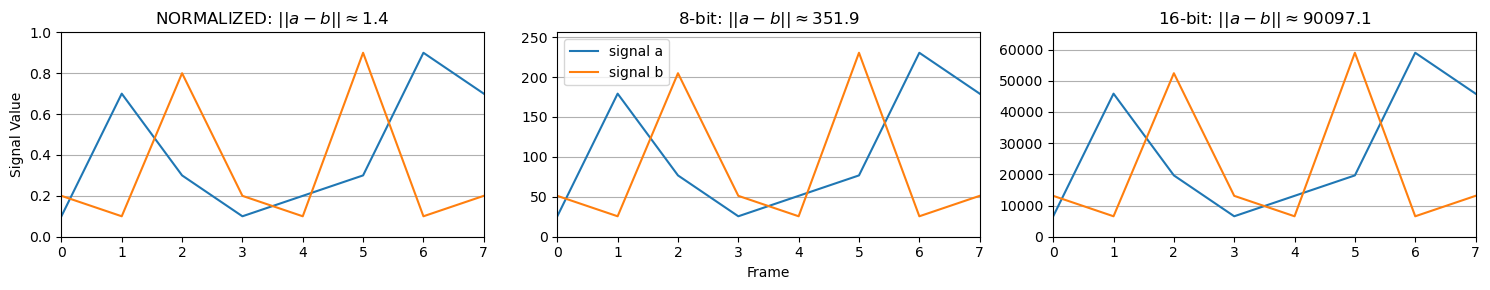

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

normalized1 = np.array([.1, .7, .3, .1, .2, .3, .9, .7])
normalized2 = np.array([.2, .1, .8, .2, .1, .9, .1, .2])

low_amp_1 = normalized1 * 2 ** 8
low_amp_2 = normalized2 * 2 ** 8
high_amp_1 = normalized1 * 2 ** 16
high_amp_2 = normalized2 * 2 ** 16

fig, axs = plt.subplots(sharex=True, ncols=3, figsize=(15, 3))
ax0, ax1, ax2 = axs

ax0.set_title(f'NORMALIZED: $||a-b||\\approx {euclidean(normalized1, normalized2):.1f}$')
ax0.plot(normalized1)
ax0.plot(normalized2)

ax0.set_ylabel('Signal Value')

ax1.set_title(f'8-bit: $||a-b|| \\approx {euclidean(low_amp_1, low_amp_2):.1f}$')
ax1.plot(low_amp_1, label='signal a')
ax1.plot(low_amp_2, label='signal b')
ax1.set_xlabel('Frame')
ax1.legend()

ax2.set_title(f'16-bit: $||a-b|| \\approx {euclidean(high_amp_1, high_amp_2):.1f}$')
ax2.plot(high_amp_1)
ax2.plot(high_amp_2)

for i, ax in enumerate(axs):
    ax.yaxis.grid(True)
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 2 ** (i * 8))

plt.tight_layout()

In [3]:

print(f'{euclidean(normalized1, normalized2)=:.2f}')
print(f'{euclidean(low_amp_1, low_amp_2)=:.2f}')
print(f'{euclidean(high_amp_1, high_amp_2)=:.2f}')

euclidean(normalized1, normalized2)=1.37
euclidean(low_amp_1, low_amp_2)=351.94
euclidean(high_amp_1, high_amp_2)=90097.10


# Signals per cluster plot

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
repr_signals_path = '/Users/julian/development/PycharmProjects/glioblastoma/data/tiny_cutout/results/H_signal_per_cluster.csv'
repr_signals = pd.read_csv(repr_signals_path)

# drop the representative ROI row
repr_signals.drop(index=0, inplace=True)
# make index start at 0
repr_signals.index = np.arange(repr_signals.shape[0])
# drop the first column
repr_signals.drop(columns=['Unnamed: 0'], inplace=True)
# make columns names (clusters) just an int
repr_signals.columns = np.arange(repr_signals.shape[1])

repr_signals = repr_signals.astype(float)
repr_signals = repr_signals.to_numpy().T


plot_cluster_signals...0.0s


(0.0, 110.0)

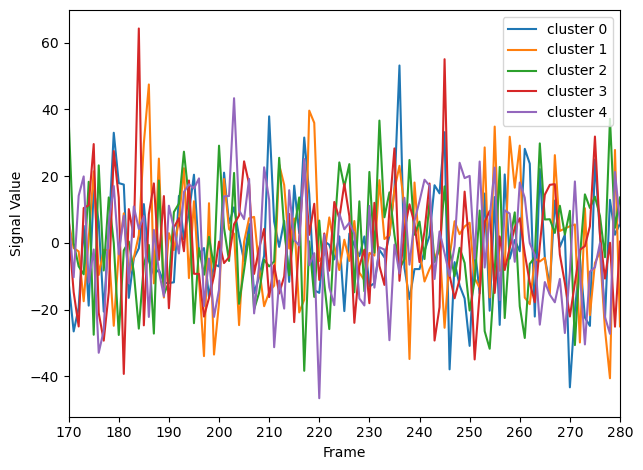

In [5]:
from src.H_representative_signals.visualization.plot_cluster_signals import plot_cluster_signals

# only plot first 100 frames
start_frame = 170
stop_frame = 281
signals_partial = repr_signals[:, start_frame:stop_frame]
fig = plot_cluster_signals(signals_partial)
ax: plt.axes = fig.axes[0]
# ax.legend().remove()

tick_interval = 10
ax.set_xticks(np.arange(0, stop_frame - start_frame, tick_interval))
ax.set_xticklabels(np.arange(start_frame, stop_frame, tick_interval))
ax.set_xlim(0, stop_frame - start_frame - 1)

# Raw to Detrended Signals Plot

In [6]:
raw_path = "/Users/julian/development/PycharmProjects/glioblastoma/data/233_NoMG_A1_cutout/results/C_raw_ROI_signals.csv"
det_path = "/Users/julian/development/PycharmProjects/glioblastoma/data/233_NoMG_A1_cutout/results/D_detrended_ROI_signals.csv"

raw = pd.read_csv(raw_path, index_col=0)
det = pd.read_csv(det_path, index_col=0)

rois = ['(3;0)', '(4;2)', '(8;1)', '(12;0)']
labels = ['Downward Trend', 'Upward Trend', 'High Amplitude', 'Low Amplitude']

n_frames_raw = raw.shape[0]
rolling_window_size = n_frames_raw - det.shape[0] + 1
# shift detrended signal to the right to align with raw signal
det.index += rolling_window_size // 2

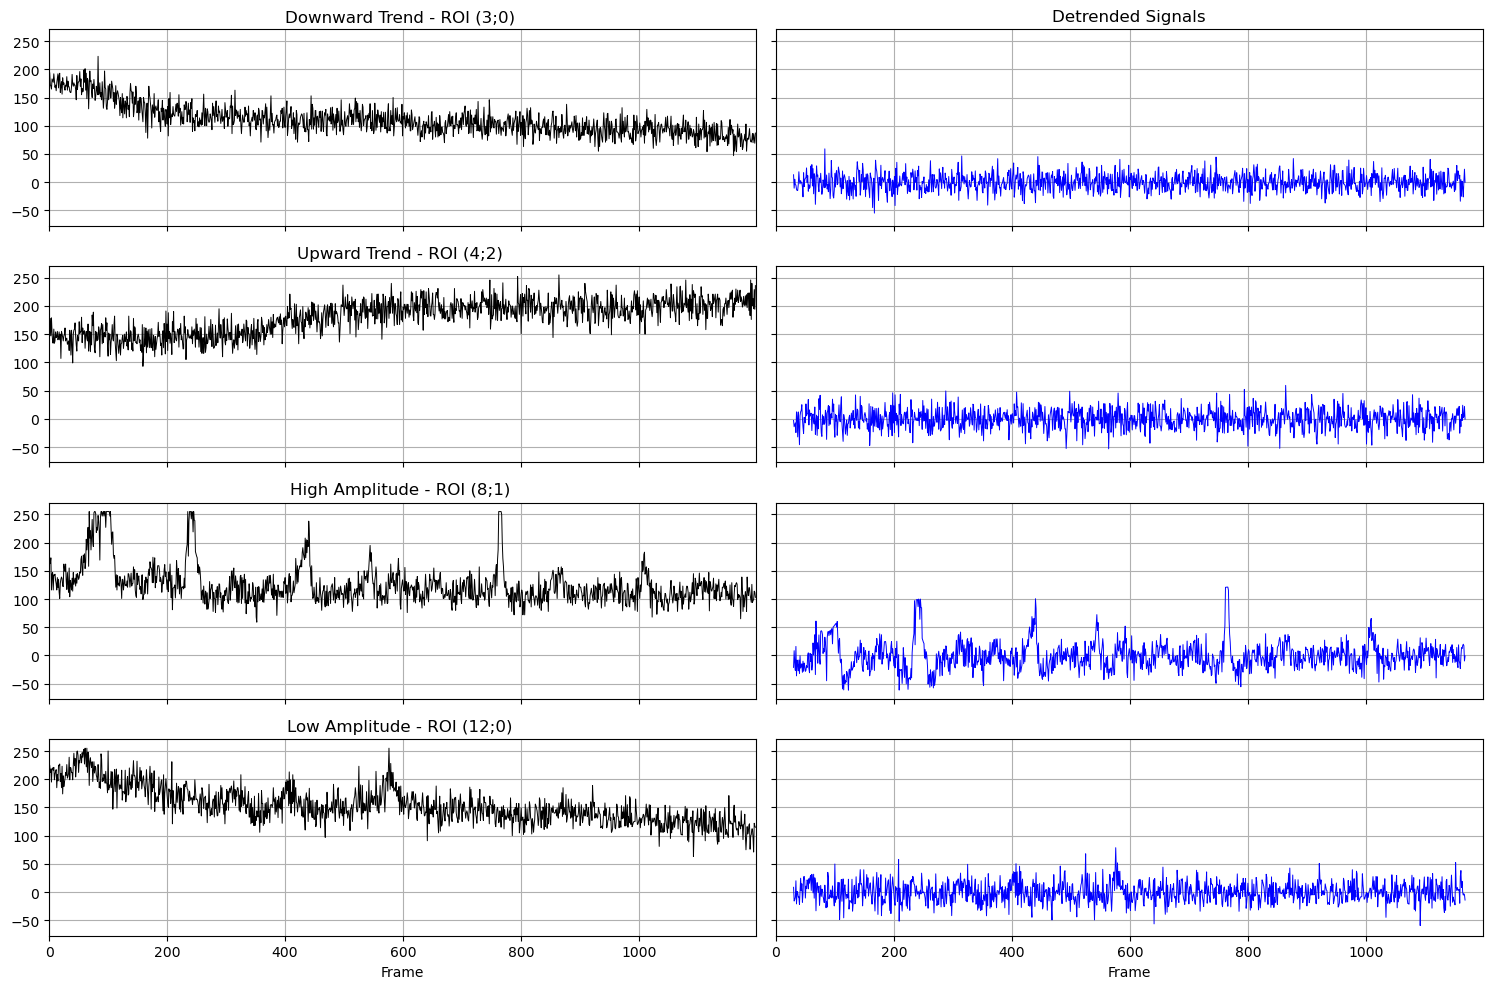

In [7]:
# plotting
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(rois), ncols=2,
                        figsize=(15, 10),
                        sharex=True, sharey=True)

axs[0, 0].set_xlim(0, n_frames_raw)

properties = {'linewidth': 0.7}

for i, roi in enumerate(rois):
    axs[i, 0].plot(raw[roi], color='black', **properties)
    axs[i, 1].plot(det[roi], color='blue', **properties)

    axs[i, 0].set_title(f'{labels[i]} - ROI {roi} ')

# for all axes
for ax in axs.flatten():
    ax.grid(True)

axs[-1, 0].set_xlabel('Frame')
axs[-1, 1].set_xlabel('Frame')

axs[0, 1].set_title('Detrended Signals')

fig.tight_layout()

Text(0.5, 0, 'Frame')

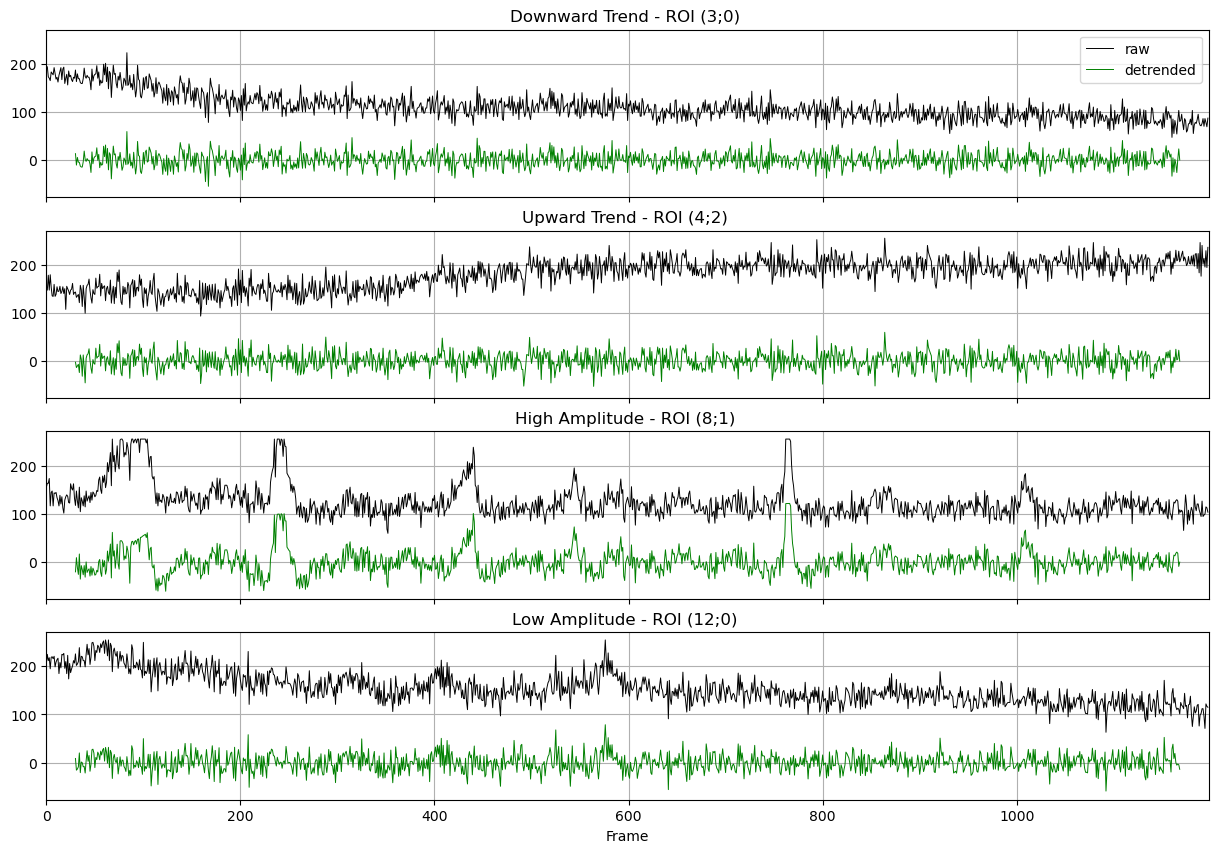

In [8]:
# plotting
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(rois), ncols=1,
                        figsize=(15, 10),
                        sharex=True, sharey=True)

axs[0].set_xlim(0, n_frames_raw)

properties = {'linewidth': 0.7}

for i, roi in enumerate(rois):
    axs[i].plot(raw[roi], color='black', label='raw', **properties)
    axs[i].plot(det[roi], color='green', label='detrended', **properties)

    axs[i].set_title(f'{labels[i]} - ROI {roi} ')

# for all axes
for ax in axs.flatten():
    ax.grid(True)

axs[0].legend()
axs[-1].set_xlabel('Frame')


# fig.tight_layout()


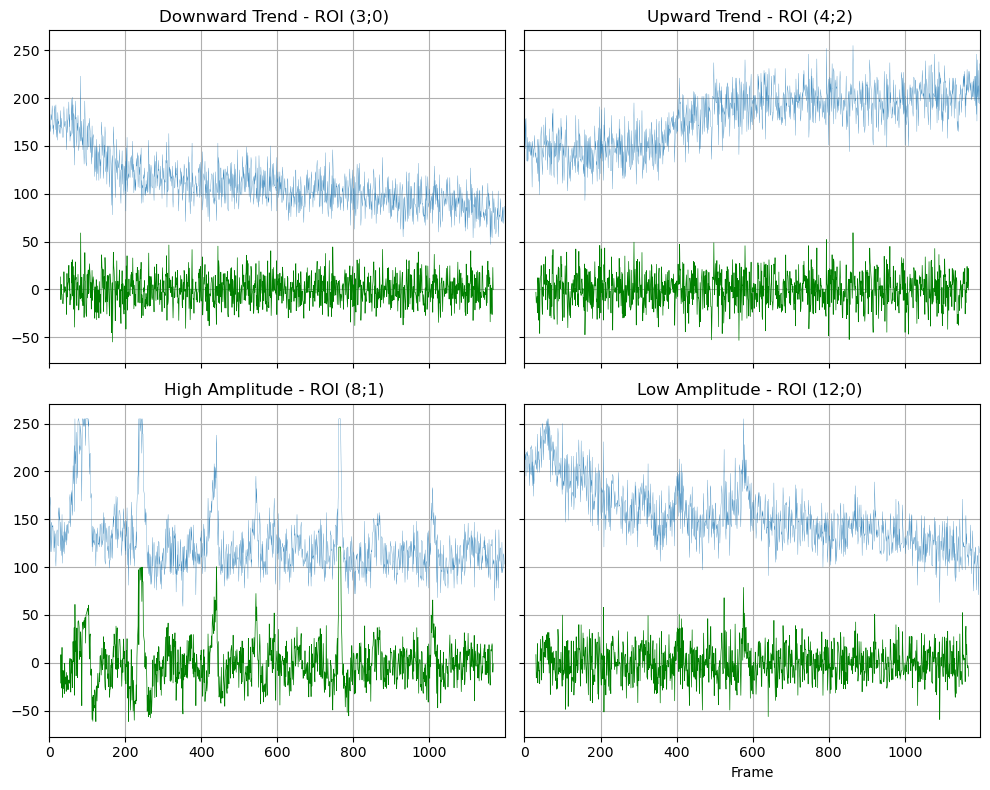

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(rois) // 2,
                        ncols = len(rois) // 2,
                        figsize=(10, 8), 
                        sharex=True, sharey=True)
axs = axes.flatten()
axs[0].set_xlim(0, n_frames_raw)

properties_raw = {'linewidth': 0.5}
properties_det = {'linewidth': 0.5}

for i, roi in enumerate(rois):
    axs[i].plot(raw[roi], color='#1f77b4', label='raw', linewidth= 0.2)
    axs[i].plot(det[roi], color='green', label='detrended', linewidth= 0.5)

    axs[i].set_title(f'{labels[i]} - ROI {roi} ')

# for all axes
for ax in axs.flatten():
    ax.grid(True)

axs[-1].set_xlabel('Frame')
# axs[0].legend()
# axs[0].set_title('Detrended Signals')

fig.tight_layout()

# Shifted Signals

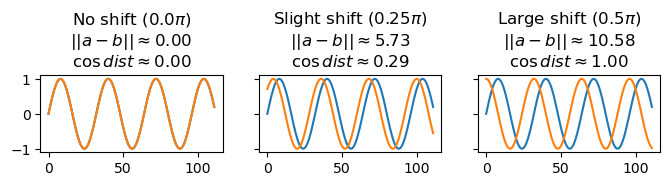

In [24]:
import numpy as np
from numpy import sin, pi
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cosine

t = np.arange(0, 7 * pi, pi / 16)

s1 = sin(t)

titles = ['No shift', 'Slight shift', 'Large shift']

fig, axs = plt.subplots(ncols=3, figsize=(8, 1), sharex=True, sharey=True)
for i in range(3):
    shift = (pi / 4) * i
    s2 = sin(t + shift)

    ax = axs[i]
    ax.plot(s1, label='signal A')
    ax.plot(s2, label='signal B')

    euc = euclidean(s1, s2)
    cos_d = cosine(s1, s2)

    # ax.legend()
    ax.set_title(f'{titles[i]} ({shift / pi}$\pi$)\n$||a-b||\\approx {euc:.2f}$\n$\\cos dist\\approx {cos_d:.2f}$')

# Shifted Signals Real


In [24]:
import pandas as pd
import numpy as np

raw_path = "/Users/julian/development/PycharmProjects/glioblastoma/data/233_NoMG_A1_cutout/results/C_raw_ROI_signals.csv"
det_path = "/Users/julian/development/PycharmProjects/glioblastoma/data/233_NoMG_A1_cutout/results/D_detrended_ROI_signals.csv"

raw = pd.read_csv(raw_path, index_col=0)
det = pd.read_csv(det_path, index_col=0)


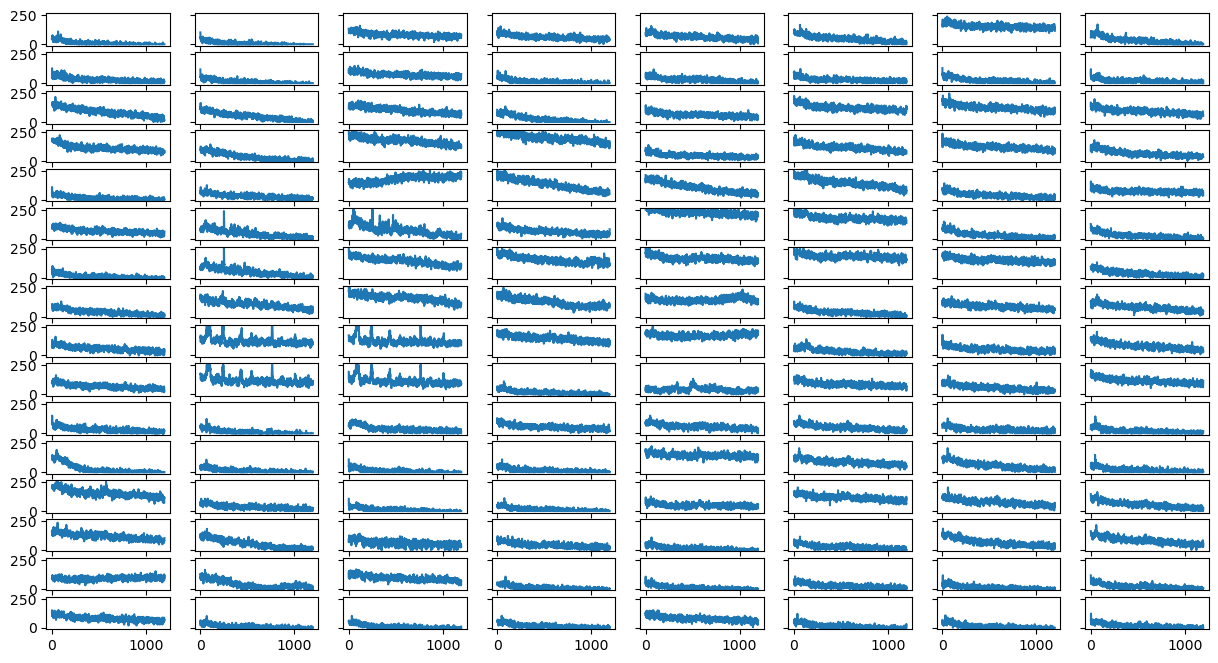

In [25]:
from src.C_get_ROI_signals.visualization.grid_plot import grid_plot
import matplotlib.pyplot as plt

# rois: 16 x 8
fig, axs = plt.subplots(nrows=16, ncols=8, figsize=(15, 8), sharex=True, sharey=True)

for x in range(16):
    for y in range(8):
        roi = f'({x};{y})'
        axs[x, y].plot(raw[roi])



Text(0.5, 0, 'Percent of recording')

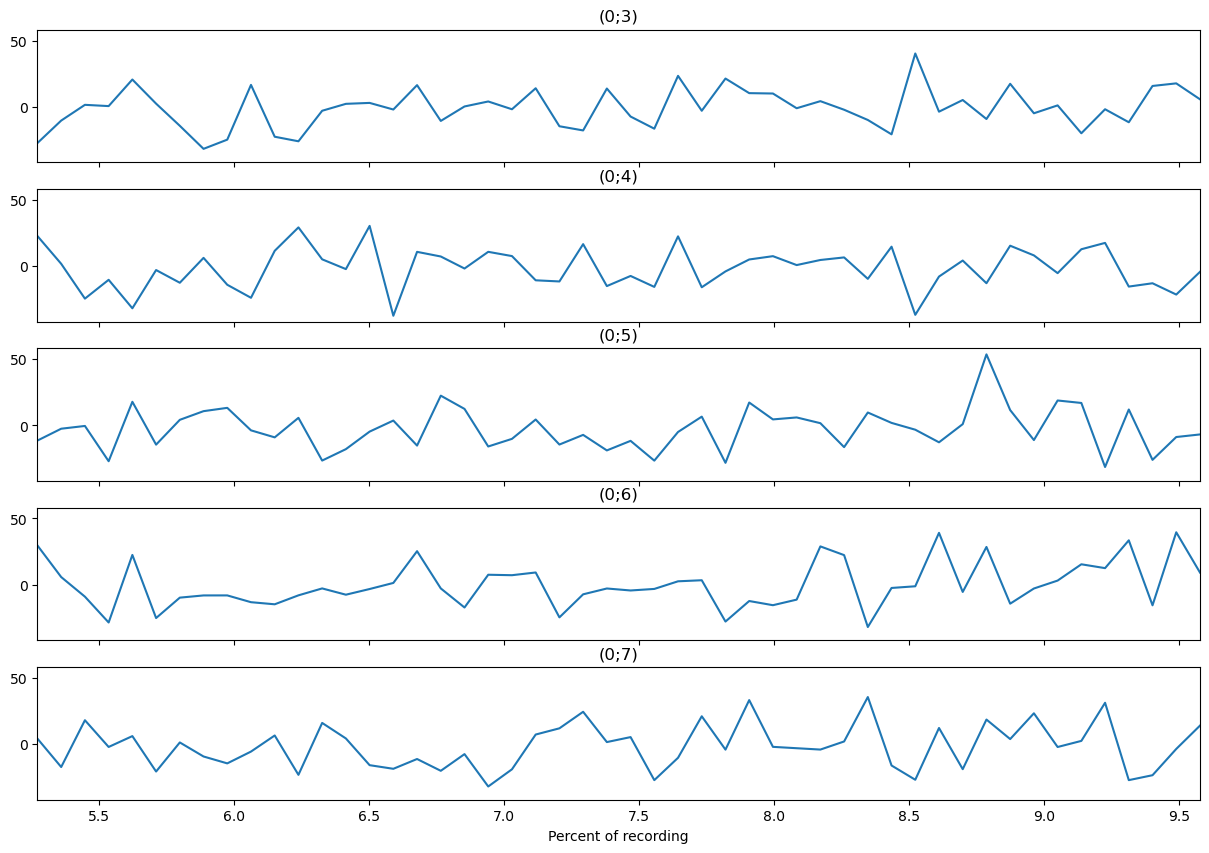

In [30]:
#left cell (lc): 
# ROIs x=0, y=[3, 7]

lc_rois = [f'(0;{y})' for y in range(3, 8)]
lc_signals = det[lc_rois]
n_frames = lc_signals.shape[0]
start = 60
stop = 110
percent = np.linspace(0, 100, n_frames)

fig, axs = plt.subplots(ncols=1, nrows=lc_signals.shape[1], figsize=(15, 10), sharex=True, sharey=True)
for i, roi in enumerate(lc_rois):
    axs[i].set_title(roi)
    axs[i].plot(percent[start:stop], lc_signals[roi][start:stop])

axs[0].autoscale(axis='x', tight=True)
axs[-1].set_xlabel('Percent of recording')

In [14]:
lc_signals.shape

(1198, 5)

Text(0.5, 0, 'Percent of recording')

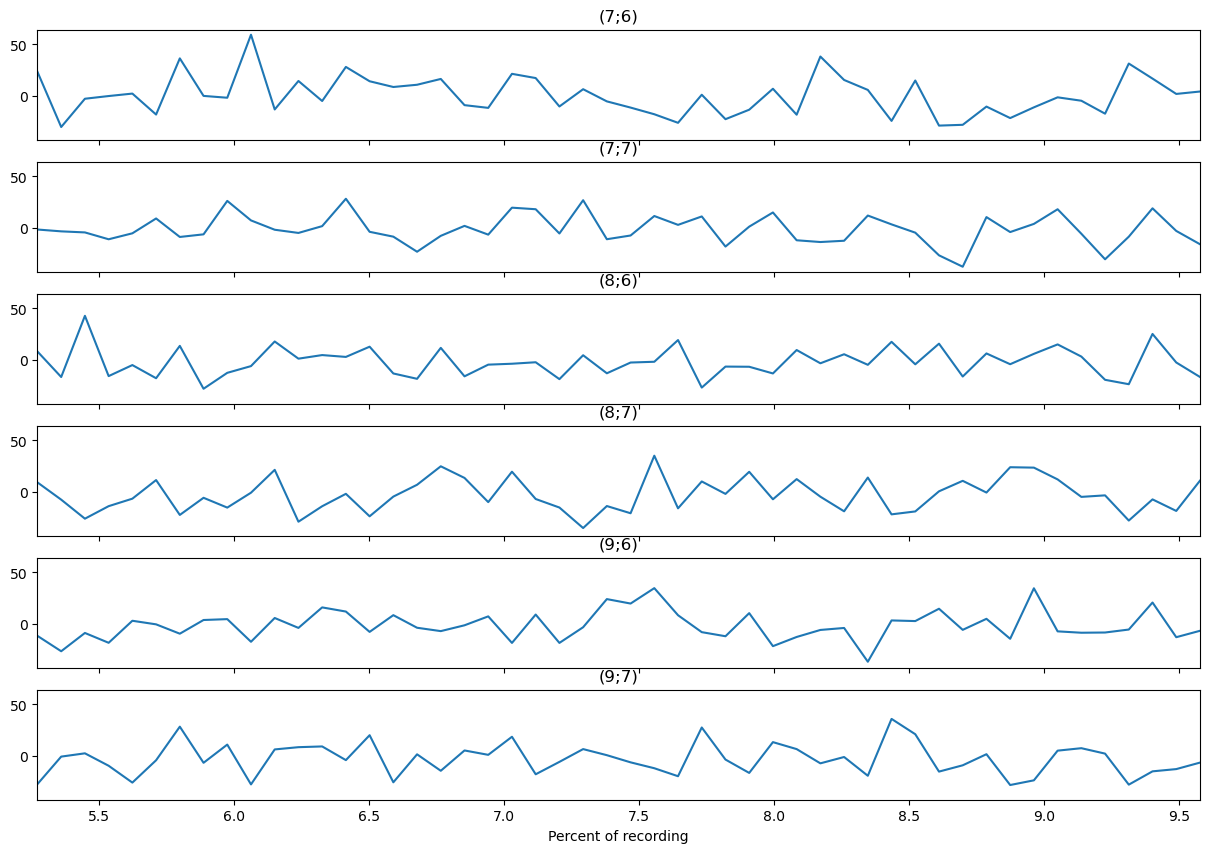

In [32]:
# bottom center cell
# x=[7,9], y=[6,7]
bc_rois = [f'({x};{y})' for x in range(7, 10) for y in range(6, 8)]
bc_signals = det[bc_rois]
n_frames = bc_signals.shape[0]
start = 60
stop = 110
percent = np.linspace(0, 100, n_frames)

fig, axs = plt.subplots(ncols=1, nrows=bc_signals.shape[1], figsize=(15, 10), sharex=True, sharey=True)
for i, roi in enumerate(bc_rois):
    axs[i].set_title(roi)
    axs[i].plot(percent[start:stop], bc_signals[roi][start:stop])

axs[0].autoscale(axis='x', tight=True)
axs[-1].set_xlabel('Percent of recording')

In [37]:
# pairwise similarities:
from scipy.spatial.distance import euclidean, cosine


def pair_sim(rois, signals):
    for r1 in rois:
        for r2 in rois:
            if r1 != r2:
                s1 = signals[r1]
                s2 = signals[r2]
                euc = euclidean(s1, s2)
                cos = cosine(s1, s2)
                print(f'{r1} - {r2}: {euc:.2f}, {1 - cos:.2f}')

In [38]:
pair_sim(bc_rois, bc_signals)

(7;6) - (7;7): 710.21, 0.03
(7;6) - (8;6): 714.55, 0.00
(7;6) - (8;7): 755.49, -0.06
(7;6) - (9;6): 726.87, -0.02
(7;6) - (9;7): 705.02, 0.05
(7;7) - (7;6): 710.21, 0.03
(7;7) - (8;6): 700.70, 0.01
(7;7) - (8;7): 732.57, -0.03
(7;7) - (9;6): 677.24, 0.08
(7;7) - (9;7): 707.23, 0.02
(8;6) - (7;6): 714.55, 0.00
(8;6) - (7;7): 700.70, 0.01
(8;6) - (8;7): 708.85, 0.02
(8;6) - (9;6): 703.85, -0.01
(8;6) - (9;7): 708.59, -0.00
(8;7) - (7;6): 755.49, -0.06
(8;7) - (7;7): 732.57, -0.03
(8;7) - (8;6): 708.85, 0.02
(8;7) - (9;6): 704.94, 0.04
(8;7) - (9;7): 711.75, 0.04
(9;6) - (7;6): 726.87, -0.02
(9;6) - (7;7): 677.24, 0.08
(9;6) - (8;6): 703.85, -0.01
(9;6) - (8;7): 704.94, 0.04
(9;6) - (9;7): 697.30, 0.04
(9;7) - (7;6): 705.02, 0.05
(9;7) - (7;7): 707.23, 0.02
(9;7) - (8;6): 708.59, -0.00
(9;7) - (8;7): 711.75, 0.04
(9;7) - (9;6): 697.30, 0.04


In [36]:
pair_sim(lc_rois, lc_signals)

(0;3) - (0;4): 673.44, -0.00
(0;3) - (0;5): 677.95, -0.04
(0;3) - (0;6): 720.23, 0.00
(0;3) - (0;7): 634.76, 0.00
(0;4) - (0;3): 673.44, -0.00
(0;4) - (0;5): 684.08, -0.02
(0;4) - (0;6): 722.92, 0.03
(0;4) - (0;7): 653.88, -0.02
(0;5) - (0;3): 677.95, -0.04
(0;5) - (0;4): 684.08, -0.02
(0;5) - (0;6): 710.36, 0.04
(0;5) - (0;7): 625.48, 0.05
(0;6) - (0;3): 720.23, 0.00
(0;6) - (0;4): 722.92, 0.03
(0;6) - (0;5): 710.36, 0.04
(0;6) - (0;7): 694.57, 0.01
(0;7) - (0;3): 634.76, 0.00
(0;7) - (0;4): 653.88, -0.02
(0;7) - (0;5): 625.48, 0.05
(0;7) - (0;6): 694.57, 0.01


In [39]:
# lots of different ROIs
dif_rois = ['(0;5)', '(7;2)', '(8;6)', '(12;5)']
dif_signals = det[dif_rois]
pair_sim(dif_rois, dif_signals)

(0;5) - (7;2): 762.10, 0.00
(0;5) - (8;6): 675.96, 0.02
(0;5) - (12;5): 718.46, -0.02
(7;2) - (0;5): 762.10, 0.00
(7;2) - (8;6): 768.54, 0.01
(7;2) - (12;5): 819.91, -0.06
(8;6) - (0;5): 675.96, 0.02
(8;6) - (7;2): 768.54, 0.01
(8;6) - (12;5): 715.62, 0.02
(12;5) - (0;5): 718.46, -0.02
(12;5) - (7;2): 819.91, -0.06
(12;5) - (8;6): 715.62, 0.02
